In [68]:
# notebook for assignment 5:

# import libraries:

import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy as sp
from scipy.optimize import curve_fit
from scipy.integrate import quad

In [14]:
def c_n(N):
    
    cn = (-1)**N *(1/math.factorial(N)) *(1/(2**(2*N))) *math.factorial(4*N) *(1/(math.factorial(2*N)))
    return cn
                                          
def c_func(lamb,N):
    
    val = c_n(N)* lamb**N
    return val

def all_terms(lamb, N):
    
    func_val = 0
    
    for i in range(N):
        func_val += c_func(lamb, i)
        
    return func_val

In [69]:
def f_exact(phi,lamb):
    return np.exp(-(phi**2)/2-lamb*(phi**4))

def Z_exact(lamb):
    vals = []
    for i in range(0,len(lamb)):

        A = 1/np.sqrt(2*np.pi)
        B = quad(f_exact,-np.inf,np.inf,args=(lamb[i]))[0]
        vals.append(A*B)
    return np.array(vals)

In [ ]:
# want to get an exact solution:



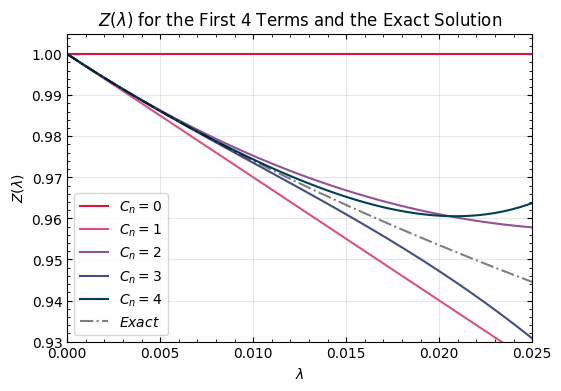

In [98]:
lambdas = np.linspace(0,0.025,100)


c_0 = [all_terms(lambdas[i], 1) for i in range(len(lambdas))]
c_1 = [all_terms(lambdas[i], 2) for i in range(len(lambdas))]
c_2 = [all_terms(lambdas[i], 3) for i in range(len(lambdas))]
c_3 = [all_terms(lambdas[i], 4) for i in range(len(lambdas))]
c_4 = [all_terms(lambdas[i], 5) for i in range(len(lambdas))]
c_ex = Z_exact(lambdas)


# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

cols = ['#003f5c','#444e86','#955196','#dd5182','crimson','#ffa600']
ax1.plot(lambdas,c_0,c=cols[4],label=r'$C_n =0$')
ax1.plot(lambdas,c_1,c=cols[3],label=r'$C_n =1$')
ax1.plot(lambdas,c_2,c=cols[2],label=r'$C_n =2$')
ax1.plot(lambdas,c_3,c=cols[1],label=r'$C_n =3$')
ax1.plot(lambdas,c_4,c=cols[0],label=r'$C_n =4$')
ax1.plot(lambdas,c_ex,c='k',label=r'$Exact$', linestyle='-.',alpha=0.5)




ax1.legend()
ax1.set_xlabel(r"$\lambda$")
ax1.set_ylabel(r"$Z(\lambda)$" )
ax1.set_title(r"$Z(\lambda)$ for the First 4 Terms and the Exact Solution" )
ax1.yaxis.set_major_locator(MultipleLocator(0.01))
ax1.yaxis.set_minor_locator(MultipleLocator(0.002))
ax1.xaxis.set_minor_locator(MultipleLocator(0.001))
ax1.xaxis.set_major_locator(MultipleLocator(0.005))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(0,0.025)
ax1.set_ylim(0.93,1.005)

ax1.grid(True, alpha=0.3)




In [187]:
# problem 4:

# we need to set up a way to solve the differential equation: 

def A(w, e):
    val = w**2 *4*(e-1)
    
    return val

def sum_equal_0(w,e=2):
    
    func = 0+1+0+(A(w,e)/2+1)/(6) + 0+ ((1/(5*4*3*2))*(-A(w,e)+(A(w,e)/2+1)**2))+((1/(6*5*3*2))*(A(w,e)*(A(w,e)/2+1)))+((1/(7*6*3*2))*((-A(w,e)*(A(w,e)/2+1))+(1/20)*(A(w,e)+(A(w,e)/2+1)**2)*(A(w,e)/2+1)))+((1/(8*7*3*2*5))*((1/6)*A(w,e)*(A(w,e)+(A(w,e)/2+1)**2)-(1/4)*(A(w,e)*((A(w,e)/2+1)**2))))
    
    return func
                                                                                                                         
                                                                                                                         
                                                                                                                         

In [190]:
# now we need to find the zeroes of this function. Will do once first:

from scipy.optimize import fsolve

# try and plot this guy once:

ww = np.linspace(-2,2, 100)

# for arbitrary value of e:

e1 = 4;

es = np.linspace(0, 4, 270)


fsolve(sum_equal_0, [-1,1], args=e1)



roots = [fsolve(sum_equal_0, [-40,40], args=es[i]) for i in range(len(es))]

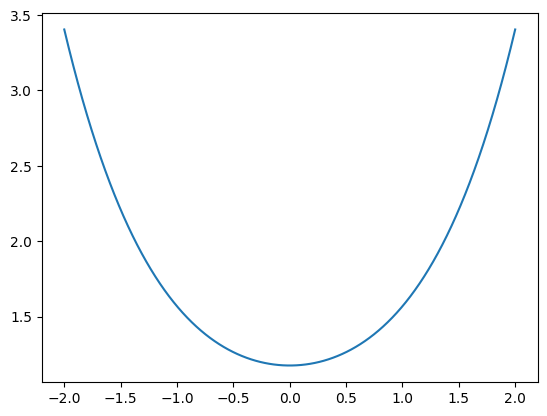

In [191]:
plt.plot(ww, sum_equal_0(ww,))

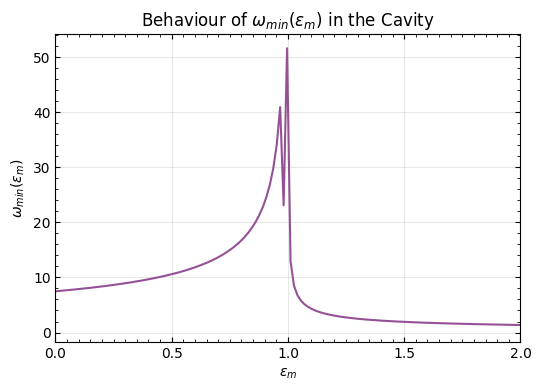

In [182]:
# plots the data:
ff, (ax1) = plt.subplots(1, 1)
ff.set_figwidth(6)
ff.set_figheight(4)

cols = ['#003f5c','#444e86','#955196','#dd5182','crimson','#ffa600']


ax1.plot(es, np.array(roots).T[1], c=cols[2])


#ax1.legend()
ax1.set_xlabel(r"$\epsilon_m$")
ax1.set_ylabel(r"$\omega_{min} (\epsilon_m)$" )
ax1.set_title(r"Behaviour of $\omega_{min} (\epsilon_m)$ in the Cavity" )
ax1.yaxis.set_major_locator(MultipleLocator(10))
ax1.yaxis.set_minor_locator(MultipleLocator(2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.05))
ax1.xaxis.set_major_locator(MultipleLocator(0.5))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')
ax1.set_xlim(0,2)
#ax1.set_ylim(0.93,1.005)

ax1.grid(True, alpha=0.3)

